In [2]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [3]:
import sys
print(sys.executable)
!{sys.executable} -m pip install bambi

/Users/Shared/anaconda3/bin/python
     |████████████████████████████████| 45 kB 9.7 MB/s  eta 0:00:01
     |████████████████████████████████| 44 kB 13.6 MB/s eta 0:00:01


In [4]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [5]:
#import excel file containing data summary

data = pd.read_csv(r'WTP_Study2_LONG_REG.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data.head())
print(data.columns)

                      subid  balanced  subtrial  social_money  \
0  56259489ed6e5a0005c80fde         1         1          0.05   
1  56259489ed6e5a0005c80fde         1         2          0.03   
2  56259489ed6e5a0005c80fde         1         3          0.01   
3  56259489ed6e5a0005c80fde         1         4          0.01   
4  56259489ed6e5a0005c80fde         1         5          0.03   

   nonsocial_money  exp_chosen  decision_price  reaction_time  response  AQ  \
0             0.02         0.0            0.02         2.0925       2.0  37   
1             0.04         0.0            0.04         1.8986       1.0  37   
2             0.03         0.0            0.03         2.2145       2.0  37   
3             0.05         1.0            0.01         1.4479       2.0  37   
4             0.02         0.0            0.02         1.3662       2.0  37   

   MSSSF     MSPSS  IRI_FS  IRI_EC  IRI_PD  IRI_PT  BRCS  LSAS  LSAS_FEAR  \
0     51  6.666667      26      20      14      15    18 

In [6]:
# #import excel file  containing data summary
# study2 = wtpdata.loc[(wtpdata['balanced'] == 1)]
# study2= study2.reset_index(drop=True)
# print(study2)


In [7]:
# sum_wtp =study2.total_spent_social
# aq = study2.AQ

In [8]:
# model_hierarchical = bmb.Model("p(sum_wtp,AQ ) ~ 1 + (1|dem_ID)", df, family="binomial")
# model_hierarchical

In [9]:
 ## getting column names
demographics = "dem_AGE + dem_GENDER +dem_SEX +dem_ETHNICITY"
sociability = "MSPSS + UM_AFFILIATION + UM_INTIMACY"
mentalizing = "AQ + IRI_PT + IRI_EC"
solitude = "MSSSF + UCLA_loneliness"
dep_anx = "RSE + CESD + LSAS + STAI"
coping = 'BRCS'
reward = 'BISBAS_BIS + BISBAS_BASRR + BISBAS_FS + BISBAS_BASD'
covid = 'COVIDexperience_score + COVIDimpacts_score + COVIDthreat_score + COVIDpsychstress_score'
y = data["exp_chosen"]

x_columns = demographics

In [10]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# def get_stats():
#     x = data[x_columns]
#     results = smf.Logit(y, x).fit()
#     print(results.summary())
# get_stats()
# x_columns.extend(sociability)
# get_stats()



In [11]:
#add demographics to model
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY', family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11244
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7754.7
Date:                Tue, 24 May 2022   Deviance:                       15509.
Time:                        10:13:47   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7359      0.162      4.553      0.000       0.419       1.053
dem_AGE          -0.0341      0.004     -8.197      0.000      -0.042      -0.026
dem_GENDER       -0.2374      0.078     -3.063      0.002      -0.389      -0.085
dem_SEX           0.2351      0.088      2.670      0.008       0.063       0.408
dem_ETHNICITY     0.0986      0.055      1.809      0.070      -0.008       0.205
=================================================================================
"""

In [12]:
#add social measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s' %(sociability), family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11241
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7589.5
Date:                Tue, 24 May 2022   Deviance:                       15179.
Time:                        10:13:47   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7975      0.191     -4.168      0.000      -1.172      -0.422
dem_AGE           -0.0312      0.004     -7.353      0.000      -0.040      -0.023
dem_GENDER        -0.1612      0.078     -2.060      0.039      -0.315      -0.008
dem_SEX            0.1243      0.091      1.369      0.171      -0.054       0.302
dem_ETHNICITY     -0.0915      0.057     -1.614      0.106      -0.203       0.020
MSPSS              0.0693      0.017      4.095      0.000       0.036       0.102
UM_AFFILIATION     0.0393      0.003     11.218      0.000       0.032       0.046
UM_INTIMACY        0.0111      0.004      3.147      0.002       0.004       0.018
==================================================================================
"""

In [13]:
#add mentalizing measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s' %(sociability, mentalizing), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11238
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7558.7
Date:                Tue, 24 May 2022   Deviance:                       15117.
Time:                        10:13:47   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1897      0.235      0.808      0.419      -0.271       0.650
dem_AGE           -0.0326      0.004     -7.571      0.000      -0.041      -0.024
dem_GENDER        -0.1943      0.079     -2.462      0.014      -0.349      -0.040
dem_SEX            0.1832      0.092      1.991      0.046       0.003       0.364
dem_ETHNICITY     -0.0728      0.057     -1.276      0.202      -0.185       0.039
MSPSS              0.0432      0.017      2.476      0.013       0.009       0.077
UM_AFFILIATION     0.0298      0.004      7.933      0.000       0.022       0.037
UM_INTIMACY        0.0177      0.004      4.560      0.000       0.010       0.025
AQ                -0.0257      0.003     -7.523      0.000      -0.032      -0.019
IRI_PT            -0.0079      0.005     -1.682      0.093      -0.017       0.001
IRI_EC            -0.0092      0.005     -1.754      0.079      -0.020       0.001
==================================================================================
"""

In [14]:
#add solitude measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s' %(sociability, mentalizing, solitude), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11236
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7538.0
Date:                Tue, 24 May 2022   Deviance:                       15076.
Time:                        10:13:47   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5286      0.327      1.616      0.106      -0.113       1.170
dem_AGE            -0.0330      0.004     -7.551      0.000      -0.042      -0.024
dem_GENDER         -0.1905      0.080     -2.395      0.017      -0.346      -0.035
dem_SEX             0.1876      0.093      2.028      0.043       0.006       0.369
dem_ETHNICITY      -0.0121      0.058     -0.209      0.835      -0.126       0.102
MSPSS               0.0375      0.024      1.585      0.113      -0.009       0.084
UM_AFFILIATION      0.0280      0.004      7.339      0.000       0.021       0.036
UM_INTIMACY         0.0185      0.004      4.743      0.000       0.011       0.026
AQ                 -0.0204      0.004     -5.682      0.000      -0.027      -0.013
IRI_PT             -0.0072      0.005     -1.507      0.132      -0.016       0.002
IRI_EC             -0.0041      0.005     -0.761      0.447      -0.015       0.006
MSSSF              -0.0177      0.003     -6.107      0.000      -0.023      -0.012
UCLA_loneliness     0.0008      0.003      0.260      0.795      -0.005       0.007
===================================================================================
"""

In [15]:
#add depression/anxiety measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s +%s' %(sociability, mentalizing, solitude, dep_anx), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11232
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7533.8
Date:                Tue, 24 May 2022   Deviance:                       15068.
Time:                        10:13:47   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4244      0.384      1.104      0.269      -0.329       1.178
dem_AGE            -0.0345      0.004     -7.695      0.000      -0.043      -0.026
dem_GENDER         -0.2001      0.082     -2.448      0.014      -0.360      -0.040
dem_SEX             0.2025      0.095      2.132      0.033       0.016       0.389
dem_ETHNICITY      -0.0298      0.059     -0.502      0.616      -0.146       0.086
MSPSS               0.0339      0.024      1.424      0.155      -0.013       0.081
UM_AFFILIATION      0.0283      0.004      7.349      0.000       0.021       0.036
UM_INTIMACY         0.0208      0.004      5.183      0.000       0.013       0.029
AQ                 -0.0181      0.004     -4.940      0.000      -0.025      -0.011
IRI_PT             -0.0067      0.005     -1.371      0.170      -0.016       0.003
IRI_EC             -0.0045      0.005     -0.833      0.405      -0.015       0.006
MSSSF              -0.0164      0.003     -5.510      0.000      -0.022      -0.011
UCLA_loneliness     0.0040      0.003      1.152      0.249      -0.003       0.011
RSE                -0.0008      0.005     -0.158      0.874      -0.011       0.009
CESD               -0.0048      0.003     -1.482      0.138      -0.011       0.002
LSAS               -0.0013      0.001     -1.749      0.080      -0.003       0.000
STAI                0.0003      0.003      0.123      0.902      -0.005       0.005
===================================================================================
"""

In [16]:
#add coping
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s +%s +%s' %(sociability, mentalizing, solitude, dep_anx,coping), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11231
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7533.4
Date:                Tue, 24 May 2022   Deviance:                       15067.
Time:                        10:13:47   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3465      0.394      0.880      0.379      -0.426       1.119
dem_AGE            -0.0346      0.004     -7.716      0.000      -0.043      -0.026
dem_GENDER         -0.1979      0.082     -2.421      0.015      -0.358      -0.038
dem_SEX             0.2028      0.095      2.135      0.033       0.017       0.389
dem_ETHNICITY      -0.0299      0.059     -0.503      0.615      -0.146       0.086
MSPSS               0.0338      0.024      1.416      0.157      -0.013       0.080
UM_AFFILIATION      0.0277      0.004      7.081      0.000       0.020       0.035
UM_INTIMACY         0.0208      0.004      5.179      0.000       0.013       0.029
AQ                 -0.0180      0.004     -4.906      0.000      -0.025      -0.011
IRI_PT             -0.0074      0.005     -1.493      0.135      -0.017       0.002
IRI_EC             -0.0049      0.005     -0.893      0.372      -0.016       0.006
MSSSF              -0.0167      0.003     -5.580      0.000      -0.023      -0.011
UCLA_loneliness     0.0038      0.003      1.096      0.273      -0.003       0.011
RSE                -0.0016      0.005     -0.311      0.756      -0.012       0.008
CESD               -0.0048      0.003     -1.455      0.146      -0.011       0.002
LSAS               -0.0013      0.001     -1.691      0.091      -0.003       0.000
STAI                0.0006      0.003      0.237      0.812      -0.004       0.006
BRCS                0.0091      0.010      0.901      0.368      -0.011       0.029
===================================================================================
"""

In [17]:
# add reward sensitivity
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s +%s +%s +%s' %(sociability, mentalizing, solitude, dep_anx,coping,reward), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11227
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7529.0
Date:                Tue, 24 May 2022   Deviance:                       15058.
Time:                        10:13:48   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4069      0.401      1.014      0.311      -0.380       1.194
dem_AGE            -0.0353      0.005     -7.456      0.000      -0.045      -0.026
dem_GENDER         -0.1965      0.082     -2.407      0.016      -0.356      -0.036
dem_SEX             0.1996      0.096      2.086      0.037       0.012       0.387
dem_ETHNICITY      -0.0381      0.061     -0.630      0.529      -0.157       0.081
MSPSS               0.0347      0.024      1.442      0.149      -0.012       0.082
UM_AFFILIATION      0.0262      0.004      6.534      0.000       0.018       0.034
UM_INTIMACY         0.0213      0.004      5.243      0.000       0.013       0.029
AQ                 -0.0183      0.004     -4.821      0.000      -0.026      -0.011
IRI_PT             -0.0071      0.005     -1.408      0.159      -0.017       0.003
IRI_EC             -0.0037      0.006     -0.661      0.509      -0.015       0.007
MSSSF              -0.0161      0.003     -5.351      0.000      -0.022      -0.010
UCLA_loneliness     0.0032      0.003      0.914      0.361      -0.004       0.010
RSE                -0.0021      0.005     -0.407      0.684      -0.012       0.008
CESD               -0.0055      0.003     -1.652      0.098      -0.012       0.001
LSAS               -0.0015      0.001     -1.904      0.057      -0.003    4.38e-05
STAI                0.0011      0.003      0.430      0.667      -0.004       0.006
BRCS                0.0064      0.010      0.619      0.536      -0.014       0.027
BISBAS_BIS          0.0045      0.006      0.776      0.438      -0.007       0.016
BISBAS_BASRR       -0.0241      0.010     -2.319      0.020      -0.045      -0.004
BISBAS_FS           0.0129      0.009      1.486      0.137      -0.004       0.030
BISBAS_BASD         0.0208      0.010      2.159      0.031       0.002       0.040
===================================================================================
"""

In [18]:
#add covid measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s +%s +%s +%s +%s' %(sociability, mentalizing, solitude, dep_anx,coping, reward, covid), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11223
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7519.8
Date:                Tue, 24 May 2022   Deviance:                       15040.
Time:                        10:13:48   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.1673      0.425     -0.393      0.694      -1.001       0.667
dem_AGE                   -0.0323      0.005     -6.653      0.000      -0.042      -0.023
dem_GENDER                -0.1580      0.083     -1.904      0.057      -0.321       0.005
dem_SEX                    0.1520      0.097      1.561      0.119      -0.039       0.343
dem_ETHNICITY             -0.0591      0.061     -0.973      0.331      -0.178       0.060
MSPSS                      0.0272      0.024      1.111      0.267      -0.021       0.075
UM_AFFILIATION             0.0241      0.004      5.782      0.000       0.016       0.032
UM_INTIMACY                0.0220      0.004      5.382      0.000       0.014       0.030
AQ                        -0.0161      0.004     -4.182      0.000      -0.024      -0.009
IRI_PT                    -0.0074      0.005     -1.448      0.148      -0.017       0.003
IRI_EC                    -0.0015      0.006     -0.268      0.789      -0.013       0.010
MSSSF                     -0.0149      0.003     -4.922      0.000      -0.021      -0.009
UCLA_loneliness            0.0030      0.003      0.860      0.390      -0.004       0.010
RSE                       -0.0023      0.005     -0.443      0.658      -0.012       0.008
CESD                      -0.0058      0.003     -1.717      0.086      -0.013       0.001
LSAS                      -0.0019      0.001     -2.389      0.017      -0.003      -0.000
STAI                       0.0010      0.003      0.388      0.698      -0.004       0.006
BRCS                       0.0060      0.010      0.576      0.564      -0.015       0.027
BISBAS_BIS                -0.0002      0.006     -0.029      0.977      -0.012       0.012
BISBAS_BASRR              -0.0190      0.011     -1.784      0.074      -0.040       0.002
BISBAS_FS                  0.0156      0.009      1.755      0.079      -0.002       0.033
BISBAS_BASD                0.0186      0.010      1.887      0.059      -0.001       0.038
COVIDexperience_score      0.0341      0.009      3.854      0.000       0.017       0.051
COVIDimpacts_score        -0.0016      0.002     -1.010      0.313      -0.005       0.002
COVIDthreat_score          0.0036      0.005      0.786      0.432      -0.005       0.012
COVIDpsychstress_score     0.0021      0.006      0.354      0.724      -0.009       0.014
==========================================================================================
"""

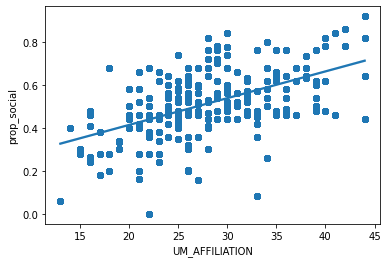

In [19]:
ax = sns.regplot(x="UM_AFFILIATION", y="prop_social", data=data)

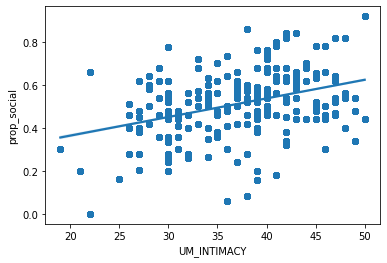

In [20]:
ax = sns.regplot(x="UM_INTIMACY", y="prop_social", data=data)

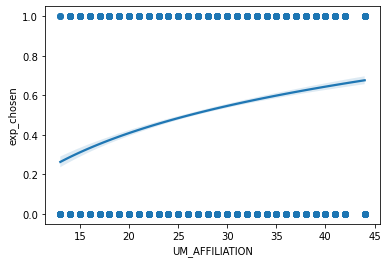

In [21]:
aff_exp = sns.regplot(x="UM_AFFILIATION", y="exp_chosen", data=data,logx = True)

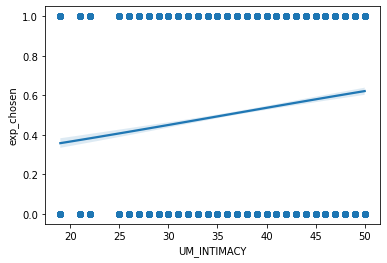

In [22]:
int_exp = sns.regplot(x="UM_INTIMACY", y="exp_chosen", data=data, logistic= True)

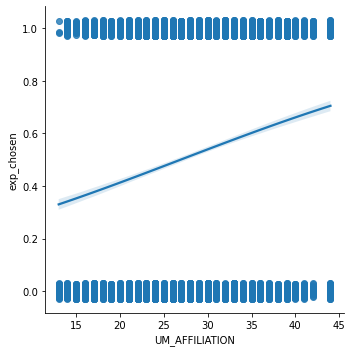

In [23]:
sns.lmplot(x="UM_AFFILIATION", y="exp_chosen", data=data,
           logistic=True, y_jitter=.03);